# Exploratory Data Analysis

The `nba_logreg.csv` dataset contains sports statistics on rookie NBA players. The goal is to develop a model to predict if a player will have a career lasting more than 5 years, to help investors identify future talents.

Data
---
| Name          | Description                              |
|---------------|------------------------------------------|
| GP            | Games Played                             |
| MIN           | MinutesPlayed                            |
| PTS           | PointsPerGame                            |
| FGM           | FieldGoalsMade                           |
| FGA           | FieldGoalAttempts                        |
| FG%           | FieldGoalPercent                         |
| 3P Made       | 3PointMade                               |
| 3PA           | 3PointAttempts                           |
| 3P%           | 3PointAttempts                           |
| FTM           | FreeThrowMade                            |
| FTA           | FreeThrowAttempts                        |
| FT%           | FreeThrowPercent                         |
| OREB          | OffensiveRebounds                        |
| DREB          | DefensiveRebounds                        |
| REB           | Rebounds                                 |
| AST           | Assists                                  |
| STL           | Steals                                   |
| BLK           | Blocks                                   |
| TOV           | Turnovers                                |
| TARGET_5Yrs   | Outcome: 1 if career length >= 5 yrs, 0 if < 5 yrs |

The percentage features are simply combinations of the previous two features.

In [1]:
import os
os.chdir("..")

import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
df = pd.read_csv("data/raw/nba_logreg.csv")

In [3]:
df.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


In [4]:
df.shape

(1340, 21)

In [5]:
df.columns

Index(['Name', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'TARGET_5Yrs'],
      dtype='object')

In [6]:
df.TARGET_5Yrs.value_counts(normalize=True)

TARGET_5Yrs
1.0    0.620149
0.0    0.379851
Name: proportion, dtype: float64

We notice that we have a slight class imbalance, that's going to require techniques like over/under sampling or adjusting class weights.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1265 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1265 non-null   object 
 1   GP           1265 non-null   int64  
 2   MIN          1265 non-null   float64
 3   PTS          1265 non-null   float64
 4   FGM          1265 non-null   float64
 5   FGA          1265 non-null   float64
 6   FG%          1265 non-null   float64
 7   3P Made      1265 non-null   float64
 8   3PA          1265 non-null   float64
 9   3P%          1256 non-null   float64
 10  FTM          1265 non-null   float64
 11  FTA          1265 non-null   float64
 12  FT%          1265 non-null   float64
 13  OREB         1265 non-null   float64
 14  DREB         1265 non-null   float64
 15  REB          1265 non-null   float64
 16  AST          1265 non-null   float64
 17  STL          1265 non-null   float64
 18  BLK          1265 non-null   float64
 19  TOV        

We only have numerical data, and there is missing data for the 3P% feature.

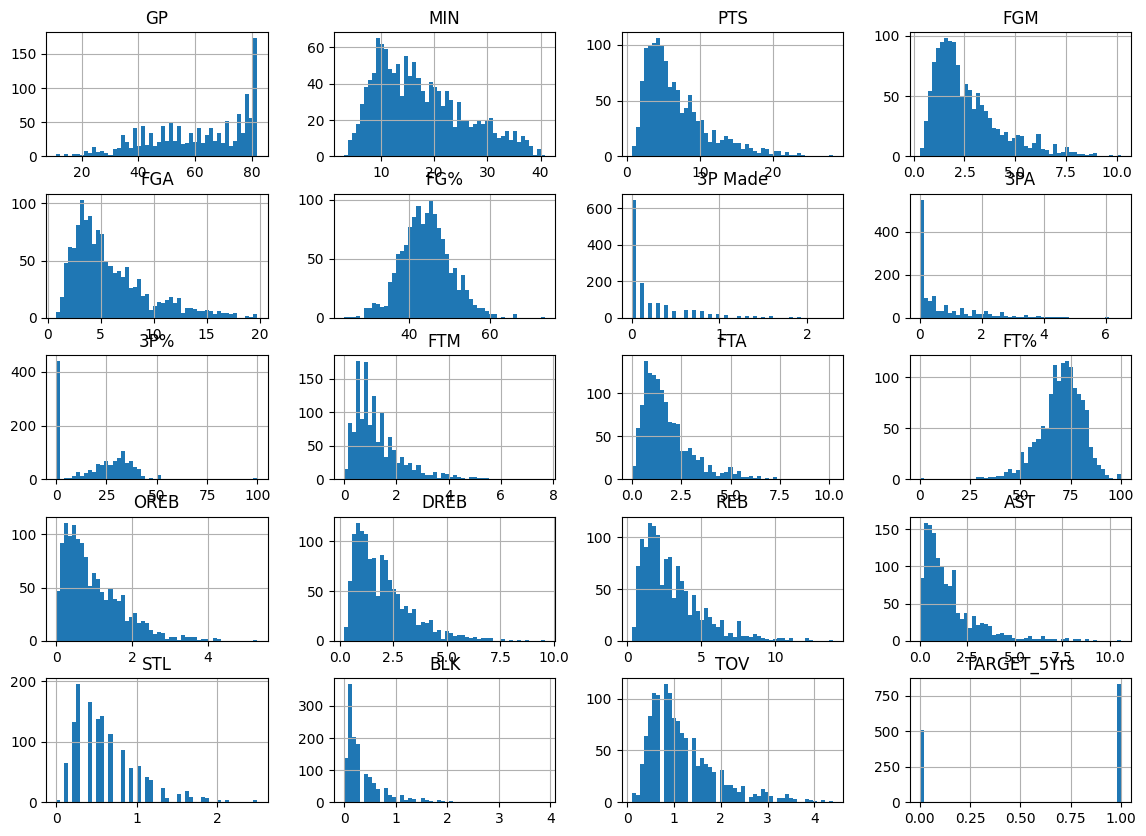

In [9]:
df.hist(bins=50, figsize=(14, 10))
plt.show()

Many histograms are skewed, which will require transformations to adjust the shape of the distributions.

In [13]:
df[df.Name.duplicated()]

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
19,Larry Johnson,82,37.2,19.2,7.5,15.3,49.0,0.1,0.3,22.7,...,5.0,82.9,3.9,7.0,11.0,3.6,1.0,0.6,1.9,1.0
72,Dee Brown,82,23.7,8.7,3.5,7.5,46.4,0.1,0.4,20.6,...,1.9,87.3,0.5,1.7,2.2,4.2,1.0,0.2,1.7,1.0
73,Dee Brown,49,9.2,1.9,0.7,2.0,32.7,0.1,0.6,21.4,...,0.8,64.9,0.2,0.7,0.8,1.7,0.5,0.1,0.6,0.0
74,Dee Brown,49,9.2,1.9,0.7,2.0,32.7,0.1,0.6,21.4,...,0.8,64.9,0.2,0.7,0.8,1.7,0.5,0.1,0.6,1.0
121,Tim Hardaway,79,33.7,14.7,5.9,12.5,47.1,0.3,1.1,27.4,...,3.5,76.4,0.7,3.2,3.9,8.7,2.1,0.1,3.3,1.0
127,Glen Rice,77,30.0,13.6,6.1,13.9,43.9,0.2,0.9,24.6,...,1.6,73.4,1.3,3.3,4.6,1.8,0.9,0.3,1.5,0.0
157,Michael Smith,65,9.5,5.0,2.1,4.4,47.6,0.0,0.4,7.1,...,1.0,82.8,0.6,0.9,1.5,1.2,0.1,0.0,0.8,1.0
158,Michael Smith,82,21.2,6.9,2.7,5.0,54.2,0.0,0.0,0.0,...,3.2,48.5,2.1,3.8,5.9,0.8,0.7,0.6,1.3,0.0
159,Michael Smith,82,21.2,6.9,2.7,5.0,54.2,0.0,0.0,0.0,...,3.2,48.5,2.1,3.8,5.9,0.8,0.7,0.6,1.3,1.0
163,Charles Smith,60,8.7,2.9,1.0,2.2,44.4,0.0,0.1,0.0,...,1.3,69.7,0.2,0.9,1.2,1.7,0.6,0.1,0.6,1.0


We can see that we have duplicate rows. Sometimes, feature values are the same but the labels are different, and sometimes all the values are different. To avoid cluttering the dataset, we will remove all the duplicate names.